In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.stats as stats

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
# Basic Data Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

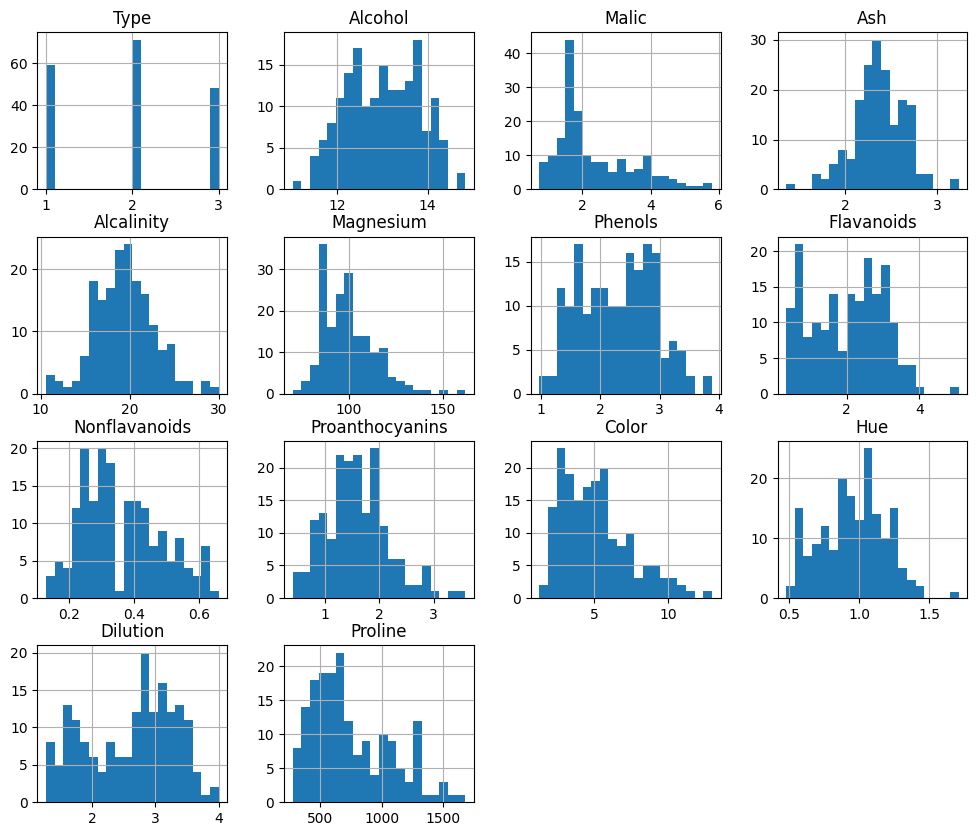

In [4]:
# Visualizing the distribution of features
df.hist(figsize=(12, 10), bins=20)
plt.show()

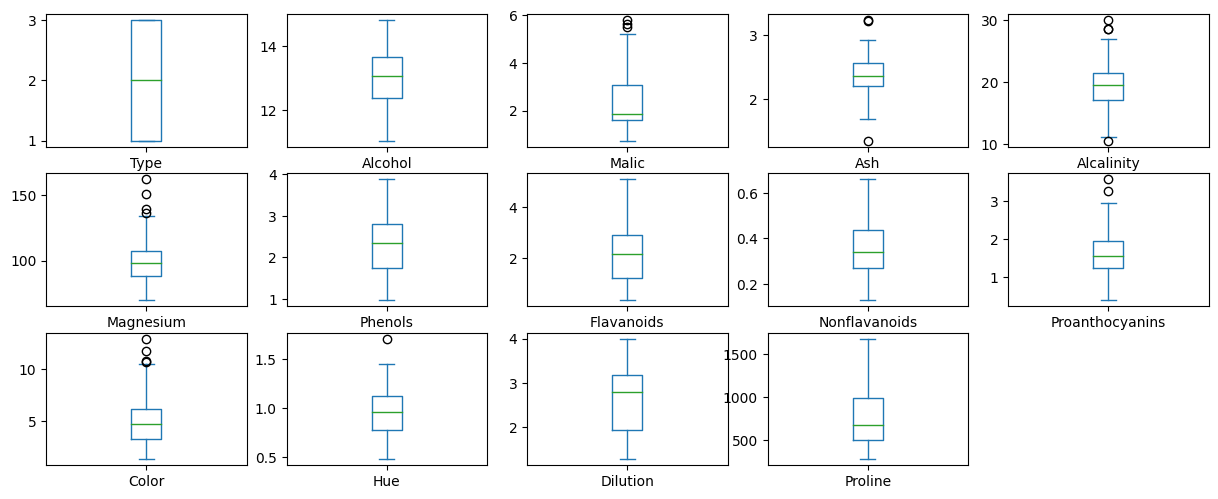

In [5]:
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10))
plt.show()

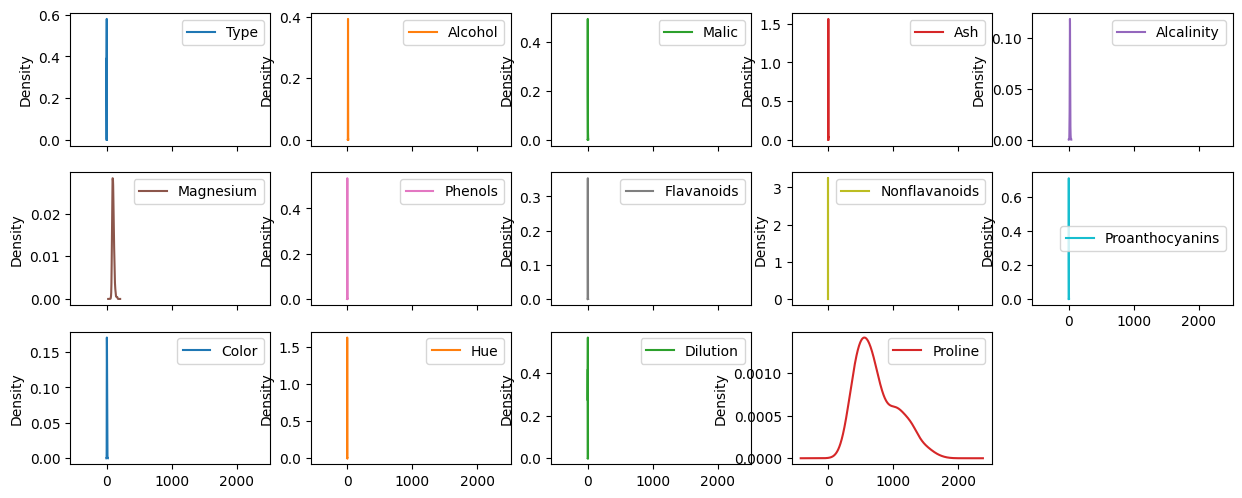

In [6]:
df.plot(kind='density', subplots=True, layout=(5, 5), figsize=(15, 10))
plt.show()

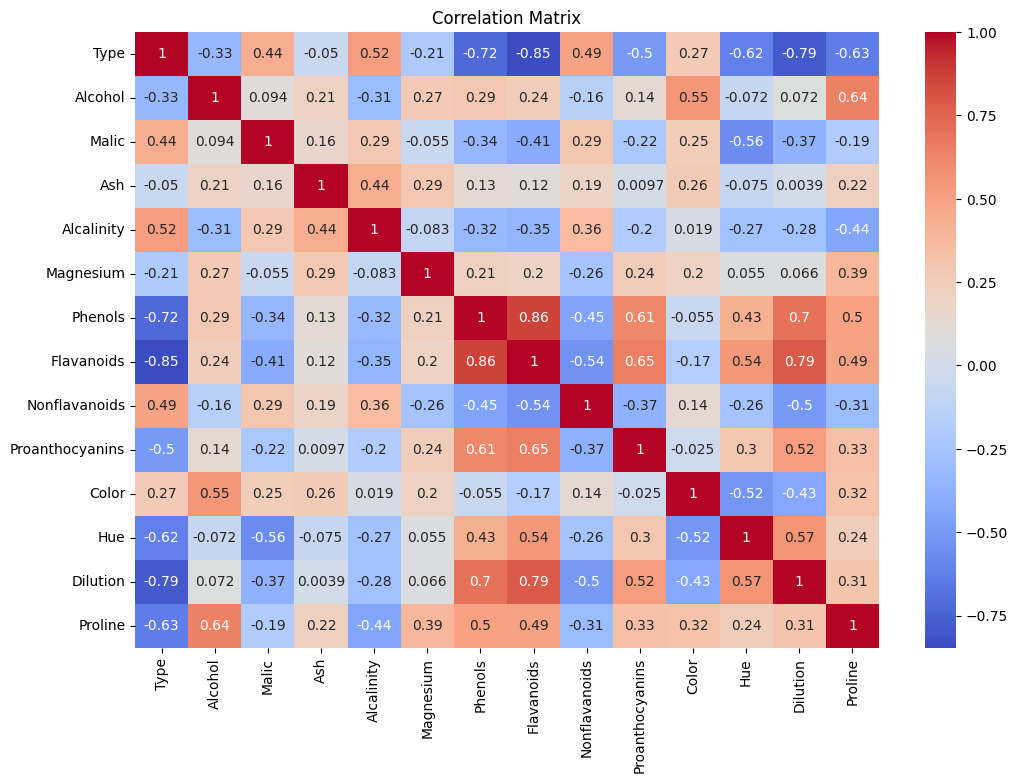

In [7]:
# Correlation matrix and heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Standardizing the dataset (zero mean, unit variance)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
pca = PCA()
pca.fit(df_scaled)

PCA()

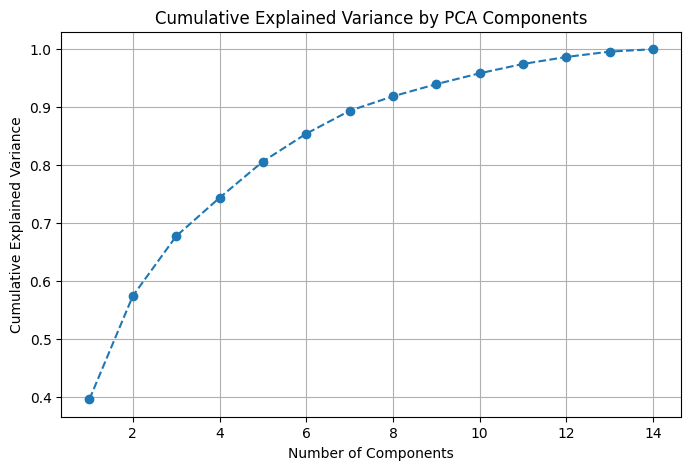

In [10]:
# Scree plot to determine optimal number of components
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [11]:
# Choosing the number of components that explain ~95% of the variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 10


In [12]:
# Transforming the original data into the principal components
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(df_scaled)
print(f'Shape of the PCA-transformed data: {df_pca.shape}')

Shape of the PCA-transformed data: (178, 10)


In [13]:
#KMeans clustering to the original dataset
kmeans_original = KMeans(n_clusters=3, random_state=42)
df['Cluster_Original'] = kmeans_original.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


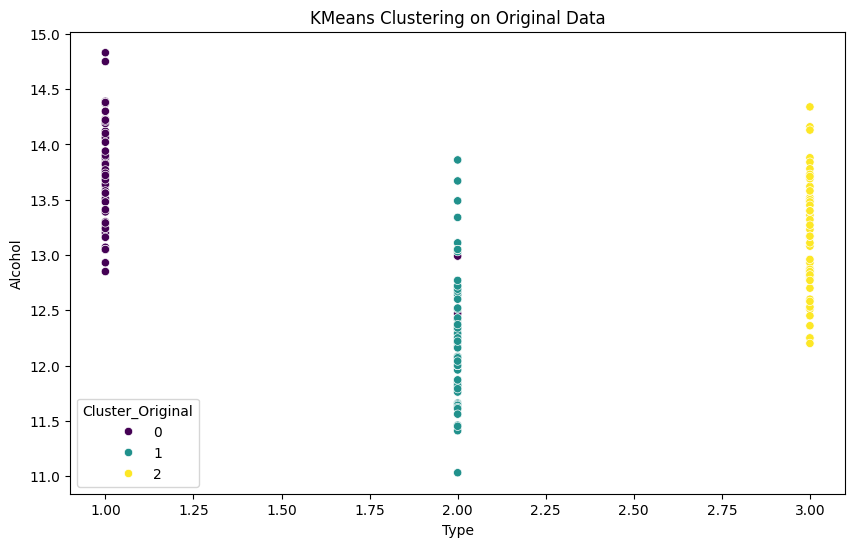

In [14]:
# Visualizing the clustering results (original data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster_Original'], palette='viridis')
plt.title('KMeans Clustering on Original Data')
plt.show()

In [15]:
# Evaluating clustering performance (Original Data)
silhouette_orig = silhouette_score(df_scaled, df['Cluster_Original'])
davies_bouldin_orig = davies_bouldin_score(df_scaled, df['Cluster_Original'])
print(f'Silhouette Score (Original Data): {silhouette_orig}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_orig}')

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


In [16]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca_clusters = kmeans_pca.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


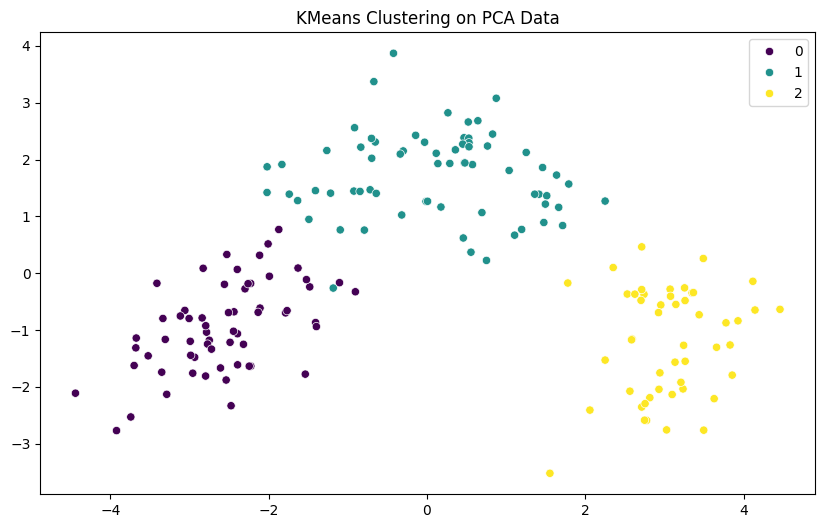

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_pca_clusters, palette='viridis')
plt.title('KMeans Clustering on PCA Data')
plt.show()

In [18]:
# Evaluating clustering performance (PCA Data)
silhouette_pca = silhouette_score(df_pca, df_pca_clusters)
davies_bouldin_pca = davies_bouldin_score(df_pca, df_pca_clusters)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.3240658205331189
Davies-Bouldin Index (PCA Data): 1.2584890242254965


In [19]:
print(f'Silhouette Score - Original Data: {silhouette_orig}, PCA Data: {silhouette_pca}')
print(f'Davies-Bouldin Index - Original Data: {davies_bouldin_orig}, PCA Data: {davies_bouldin_pca}')

Silhouette Score - Original Data: 0.30773604383565206, PCA Data: 0.3240658205331189
Davies-Bouldin Index - Original Data: 1.3163957434114109, PCA Data: 1.2584890242254965


In [20]:
if silhouette_pca > silhouette_orig:
    print("Clustering after PCA improves performance based on the Silhouette Score.")
else:
    print("Clustering on the original data yields better performance based on the Silhouette Score.")

Clustering after PCA improves performance based on the Silhouette Score.


In [21]:
print("""
Dimensionality reduction via PCA helps in reducing the complexity of the data, which can improve clustering performance and reduce computational costs.
However, there can be a loss of information, which may degrade clustering quality depending on the dataset.
""")

print("""
Key findings:
1. PCA can help reduce the number of features while retaining most of the data’s variance.
2. Clustering with PCA-transformed data can perform similarly or even better, depending on the dataset.

Practical implications:
- PCA is useful when you have many features, especially when many are correlated.
- It’s important to check the variance explained by the PCA components before proceeding with further analysis.

Recommendations:
- If the dataset is high-dimensional or has strong correlations between features, PCA can help.
- If interpretability is a concern, clustering on the original dataset might be preferable.
""")


Dimensionality reduction via PCA helps in reducing the complexity of the data, which can improve clustering performance and reduce computational costs.
However, there can be a loss of information, which may degrade clustering quality depending on the dataset.


Key findings:
1. PCA can help reduce the number of features while retaining most of the data’s variance.
2. Clustering with PCA-transformed data can perform similarly or even better, depending on the dataset.

Practical implications:
- PCA is useful when you have many features, especially when many are correlated.
- It’s important to check the variance explained by the PCA components before proceeding with further analysis.

Recommendations:
- If the dataset is high-dimensional or has strong correlations between features, PCA can help.
- If interpretability is a concern, clustering on the original dataset might be preferable.

